# RIO-125: HR Salary Dashboard - Train the Dataset and Predict Salary
***

In [103]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [104]:
# Reading the csv file into Pandas Dataframe
path="/content/drive/MyDrive/Salary Dataset.csv"
data=pd.read_csv(path)

In [105]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
data.head()

,Age,Workclass,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   Education       32561 non-null  object
 3   Education-num   32561 non-null  int64 
 4   Marital-status  32561 non-null  object
 5   Occupation      32561 non-null  object
 6   Relationship    32561 non-null  object
 7   Race            32561 non-null  object
 8   Sex             32561 non-null  object
 9   Capital-gain    32561 non-null  int64 
 10  Capital-loss    32561 non-null  int64 
 11  Hours-per-week  32561 non-null  int64 
 12  Native-country  32561 non-null  object
 13  Salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


**<u>Findings:</u> <br>**
The Data types in the dataset are of int64 and object datatypes

In [108]:
data.describe()

,Age,Education-num,Capital-gain,Capital-loss,Hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [109]:
data.shape

(32561, 14)

In [110]:
data.isna().sum()

Age               0
Workclass         0
Education         0
Education-num     0
Marital-status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Hours-per-week    0
Native-country    0
Salary            0
dtype: int64

**<u>Findings:</u> <br>**
There is no null values in the dataset

In [111]:
data['Education-num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8])

In [112]:
data['Education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

**<u>Findings:</u> <br>**
The Education-num and Education are same. Education-num just shows the Education in numerical form

##  <u>Data Cleaning</u>

### Removing Unwanted Columns

In [113]:
data.columns

Index(['Age', 'Workclass', 'Education', 'Education-num', 'Marital-status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain',
       'Capital-loss', 'Hours-per-week', 'Native-country', 'Salary'],
      dtype='object')

***
**The columns 'Education-num','Capital-loss','Capital-gain' has no significance in salary prediction so they are removed**
***

In [114]:
data=data.drop(columns=['Education-num','Capital-loss','Capital-gain'],axis=1)
data

,Age,Workclass,Education,Marital-status,Occupation,Relationship,Race,Sex,Hours-per-week,Native-country,Salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


### Checking for special characters in the dataset

In [115]:
data.isin(['?']).sum()

Age                  0
Workclass         1836
Education            0
Marital-status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Hours-per-week       0
Native-country     583
Salary               0
dtype: int64

***
**<u>Findings:</u> <br>**
A special character "?", found in the Workclass, Occupation and Native-Country columns so they are located and removed
***

In [116]:
data.loc[(data['Occupation'] == '?') | (data['Workclass'] == '?') | (data['Native-country'] == '?')]

,Age,Workclass,Education,Marital-status,Occupation,Relationship,Race,Sex,Hours-per-week,Native-country,Salary
14,40,Private,Assoc-voc,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,40,?,>50K
27,54,?,Some-college,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,60,South,>50K
38,31,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,38,?,>50K
51,18,Private,HS-grad,Never-married,Other-service,Own-child,White,Female,30,?,<=50K
61,32,?,7th-8th,Married-spouse-absent,?,Not-in-family,White,Male,40,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,Bachelors,Married-civ-spouse,?,Wife,White,Female,55,United-States,>50K
32531,30,?,Bachelors,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,99,United-States,<=50K
32539,71,?,Doctorate,Married-civ-spouse,?,Husband,White,Male,10,United-States,>50K
32541,41,?,HS-grad,Separated,?,Not-in-family,Black,Female,32,United-States,<=50K


In [117]:
data['Workclass'].value_counts()['?']

1836

In [118]:
data['Occupation'].value_counts()['?']

1843

In [119]:
data['Native-country'].value_counts()['?']

583

In [120]:
#Removing rows containing "?"
data.drop(data[data['Workclass'] == '?'].index, inplace = True)
data.drop(data[data['Occupation'] == '?'].index, inplace = True)
data.drop(data[data['Native-country'] == '?'].index, inplace = True)
data

,Age,Workclass,Education,Marital-status,Occupation,Relationship,Race,Sex,Hours-per-week,Native-country,Salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [121]:
data.head(20)

,Age,Workclass,Education,Marital-status,Occupation,Relationship,Race,Sex,Hours-per-week,Native-country,Salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
5,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
6,49,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K
8,31,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,>50K
9,42,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K


In [122]:
data.isin(['?']).sum()

Age               0
Workclass         0
Education         0
Marital-status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours-per-week    0
Native-country    0
Salary            0
dtype: int64

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             30162 non-null  int64 
 1   Workclass       30162 non-null  object
 2   Education       30162 non-null  object
 3   Marital-status  30162 non-null  object
 4   Occupation      30162 non-null  object
 5   Relationship    30162 non-null  object
 6   Race            30162 non-null  object
 7   Sex             30162 non-null  object
 8   Hours-per-week  30162 non-null  int64 
 9   Native-country  30162 non-null  object
 10  Salary          30162 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.8+ MB


***
**After removing the special character, it is again checked to see if the values is present in any columns**
***

In [124]:
#Resetting the index values
data.reset_index(inplace = True,drop=True)
data.head(20)

,Age,Workclass,Education,Marital-status,Occupation,Relationship,Race,Sex,Hours-per-week,Native-country,Salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
5,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
6,49,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K
8,31,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,>50K
9,42,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K


***


**After removing the rows which contained the special characher, some index vales are missing (like 14th index is missing) so the index values are resetted**
***

## <u>Exploratory Data Analysis(EDA)</u>


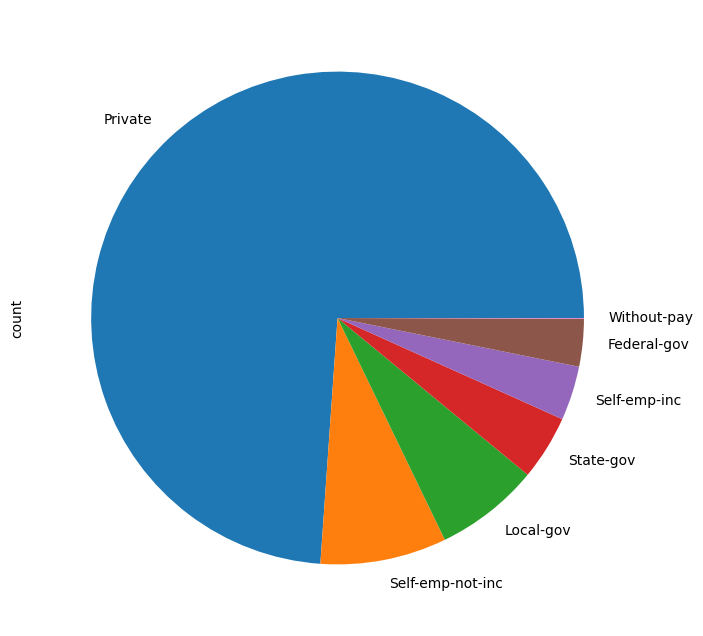

In [125]:
plt.figure(figsize=(10,8))
data['Workclass'].value_counts().plot(kind = 'pie')
plt.show()

<Axes: xlabel='count', ylabel='Workclass'>

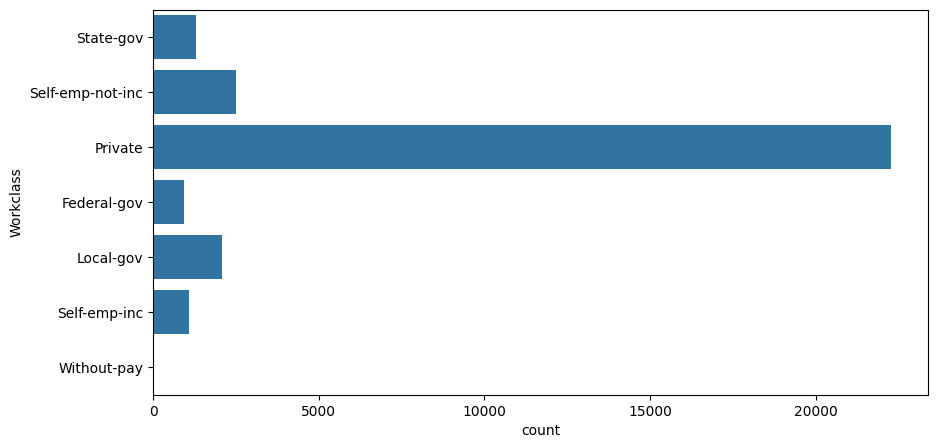

In [126]:
plt.figure(figsize=(10,5))
sns.countplot(data['Workclass'])

**<u>Findings:</u> <br>**
The pie chart and count plot shows that the most of the employees belong to the private Workclass

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 [Text(0.0, 0, '0'),
  Text(2000.0, 0, '2000'),
  Text(4000.0, 0, '4000'),
  Text(6000.0, 0, '6000'),
  Text(8000.0, 0, '8000'),
  Text(10000.0, 0, '10000'),
  Text(12000.0, 0, '12000')])

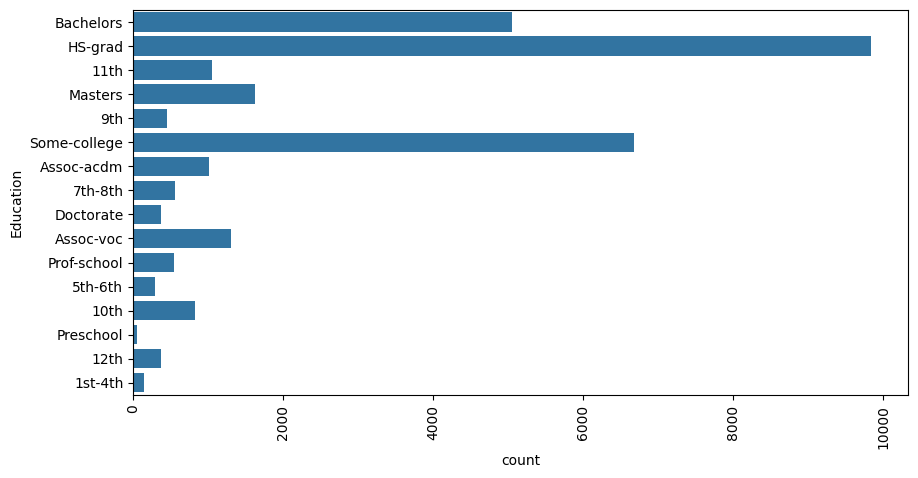

In [127]:
plt.figure(figsize=(10,5))
sns.countplot(data['Education'])
plt.xticks(rotation=90)

**<u>Findings:</u> <br>**
The above count plot shows that the most of the employees have HS-grand level of Education

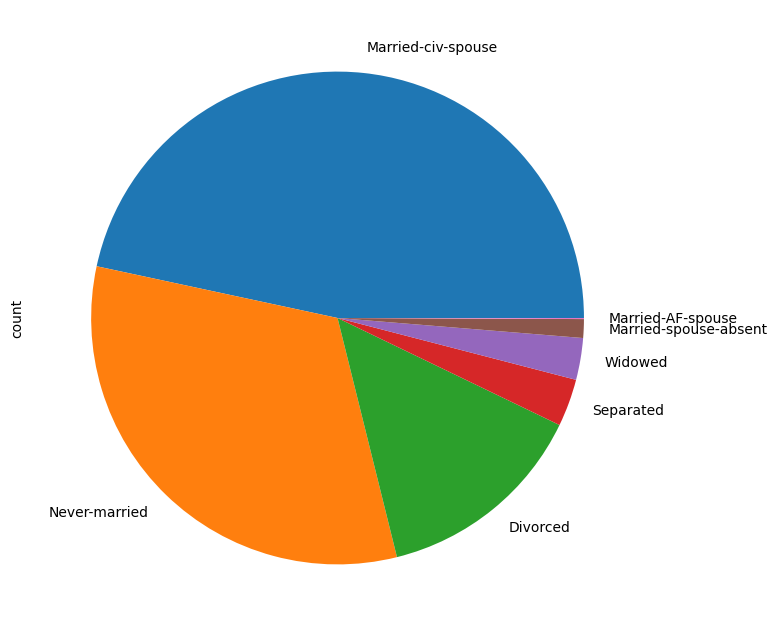

In [128]:
plt.figure(figsize=(10,8))
data['Marital-status'].value_counts().plot(kind = 'pie')
plt.show()

**<u>Findings:</u> <br>**
The above pie chart shows the Marital statues of the employees. Most of the employees are married to civ spouse and some others are never married and there other catergories of people too

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]),
 [Text(0.0, 0, '0'),
  Text(500.0, 0, '500'),
  Text(1000.0, 0, '1000'),
  Text(1500.0, 0, '1500'),
  Text(2000.0, 0, '2000'),
  Text(2500.0, 0, '2500'),
  Text(3000.0, 0, '3000'),
  Text(3500.0, 0, '3500'),
  Text(4000.0, 0, '4000'),
  Text(4500.0, 0, '4500')])

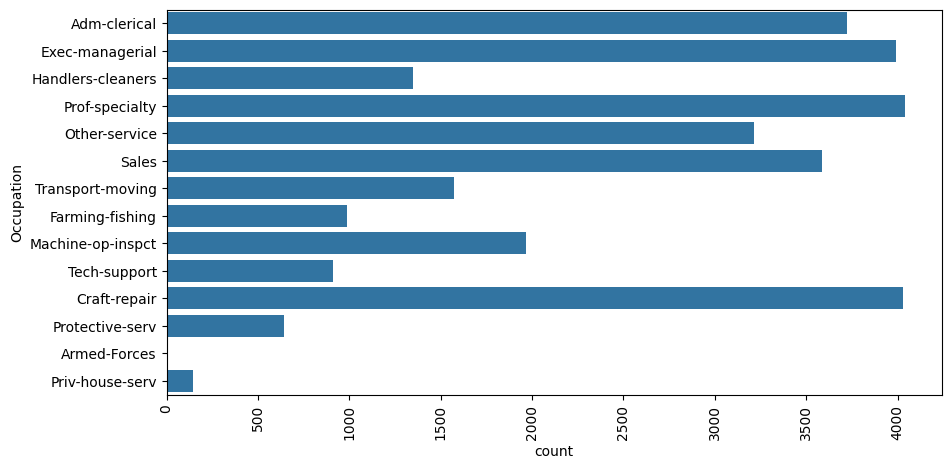

In [129]:
plt.figure(figsize=(10,5))
sns.countplot(data['Occupation'])
plt.xticks(rotation=90)

**<u>Findings:</u> <br>**
The count plot shows that most of the employees do craft repair and prof speciality

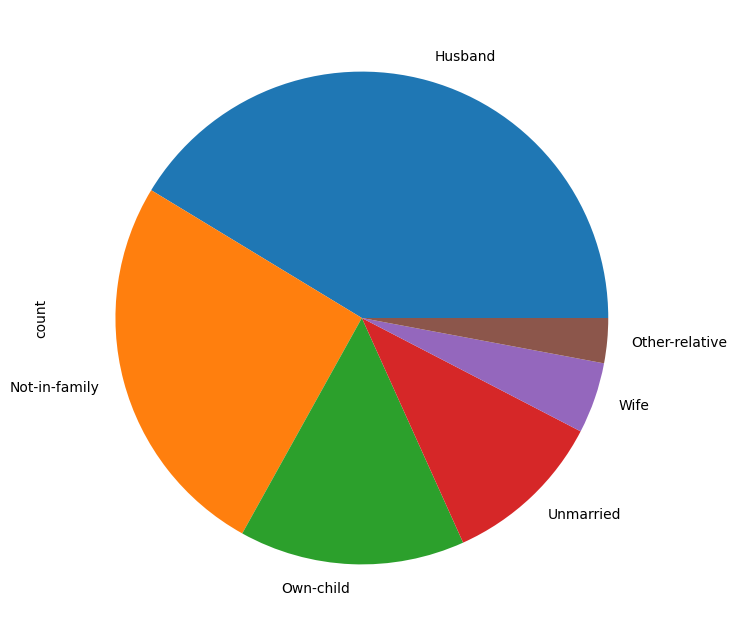

In [130]:
plt.figure(figsize=(10,8))
data['Relationship'].value_counts().plot(kind = 'pie')
plt.show()

**<u>Findings:</u> <br>**
The above pie chart shows about the Relationship status of the employees. Most of them are Husband

<Axes: xlabel='count', ylabel='Race'>

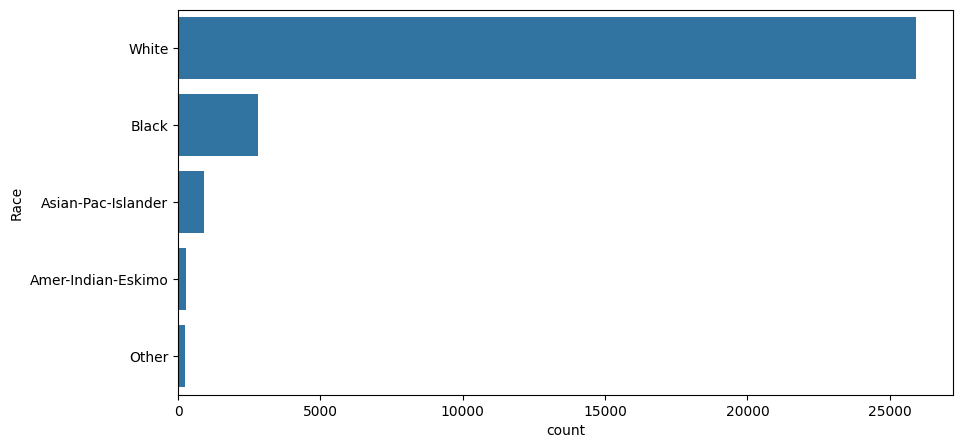

In [131]:
plt.figure(figsize=(10,5))
sns.countplot(data['Race'])

**<u>Findings:</u> <br>**
The count plot shows the number of people from different differnt Races. Most of the employees belong to White Race

<Axes: xlabel='count', ylabel='Sex'>

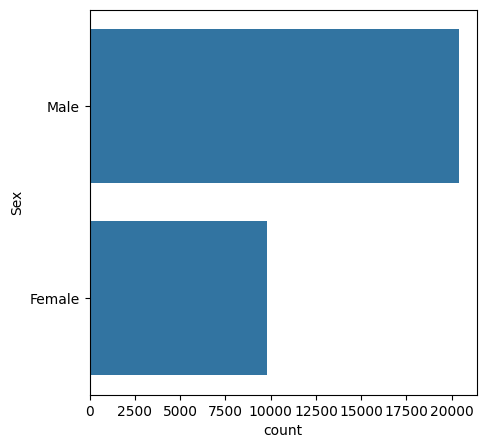

In [132]:
plt.figure(figsize=(5,5))
sns.countplot(data['Sex'])

**<u>Findings:</u> <br>**
The above count plot shows the number of genders of employess. Most of the employees are Males

Text(0.5, 1.0, 'Top 10 Countries Wise Count \n')

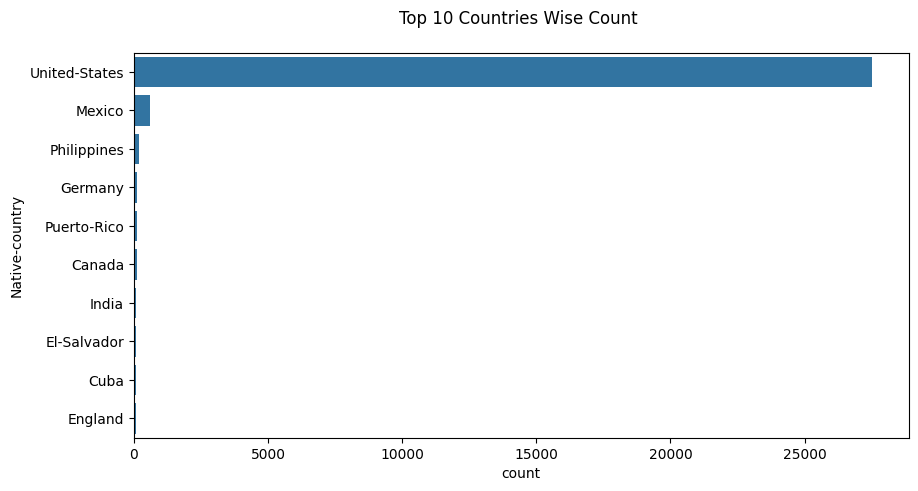

In [133]:
plt.figure(figsize=(10,5))
sns.countplot(data['Native-country'],order = data['Native-country'].value_counts().nlargest(10).index)
plt.title('Top 10 Countries Wise Count \n')

**<u>Findings:</u> <br>**
The above count plot shows the number of employes from different countires. And most of the employess are from United Satates

(array([  511.,  1877.,  1995., 16582.,  3004.,  3736.,  1721.,   421.,
          184.,   131.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

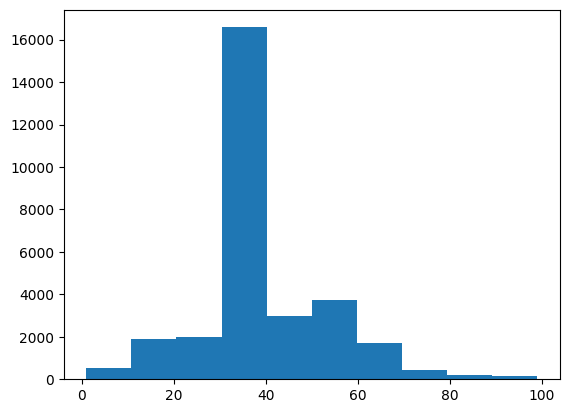

In [134]:
plt.hist('Hours-per-week',data=data)

**<u>Findings:</u> <br>**
The histogram shows the number of working hours per week.

<Axes: xlabel='count', ylabel='Salary'>

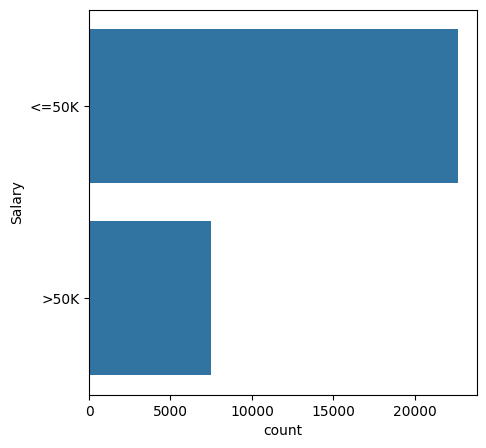

In [135]:
plt.figure(figsize=(5,5))
sns.countplot(data['Salary'])

**<u>Findings:</u> <br>**
The count plot shows the number of employees receiving the type fo salary. Most of the employees recive salary less than or equal to 50K

# <u>PreProcessing</u>

In [136]:
data.isna().sum()

Age               0
Workclass         0
Education         0
Marital-status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours-per-week    0
Native-country    0
Salary            0
dtype: int64

**The dataset has no  null values**

## <u> Outlier Handling</u>

In [137]:
data.iloc[:,(np.where(data.dtypes == np.int64))[0]].columns

Index(['Age', 'Hours-per-week'], dtype='object')

**<u>Findings:</u> <br>**
The coluns with numerical datatypes are Age and Hours-per-week so they are checked to find if there is any outliers present in those columns

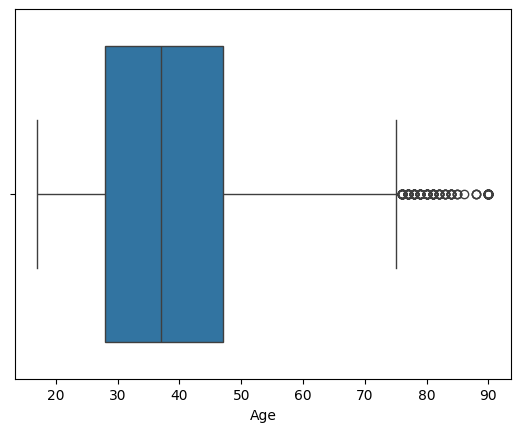

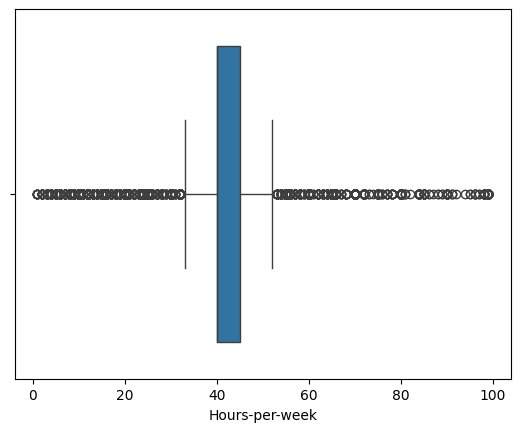

In [138]:
for i in ['Age', 'Hours-per-week']:
    sns.boxplot(x=data[i])
    plt.show()

**<u>Findings:</u> <br>**
There are outliers in the Age and Hours-per-week column

**Age**

In [139]:
Q1=np.percentile(data['Age'],25,interpolation='midpoint')
Q3=np.percentile(data['Age'],75,interpolation='midpoint')
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
outlier=[]
for x in data['Age']:
    if x>upper_limit or x<lower_limit:
        outlier.append(x)
outlier

[79,
 76,
 90,
 77,
 76,
 81,
 78,
 90,
 88,
 90,
 77,
 90,
 77,
 78,
 80,
 90,
 81,
 81,
 76,
 80,
 90,
 76,
 79,
 76,
 81,
 76,
 90,
 90,
 80,
 90,
 90,
 79,
 78,
 79,
 84,
 90,
 77,
 80,
 77,
 90,
 81,
 83,
 84,
 79,
 76,
 85,
 82,
 79,
 77,
 90,
 76,
 90,
 84,
 78,
 78,
 76,
 80,
 90,
 90,
 77,
 76,
 84,
 76,
 90,
 76,
 90,
 76,
 77,
 90,
 77,
 78,
 77,
 81,
 78,
 82,
 81,
 77,
 76,
 80,
 90,
 80,
 84,
 82,
 78,
 79,
 76,
 90,
 84,
 90,
 83,
 78,
 80,
 77,
 78,
 76,
 79,
 80,
 79,
 80,
 90,
 90,
 90,
 81,
 76,
 83,
 90,
 90,
 81,
 80,
 80,
 90,
 79,
 77,
 77,
 80,
 76,
 82,
 85,
 80,
 79,
 90,
 76,
 76,
 77,
 76,
 79,
 81,
 77,
 88,
 90,
 82,
 76,
 88,
 76,
 77,
 83,
 76,
 77,
 79,
 77,
 86,
 90,
 77,
 82,
 83,
 81,
 76,
 79,
 76,
 84,
 78,
 76,
 76,
 76,
 78,
 84,
 79,
 78,
 90,
 80,
 81,
 78,
 81,
 90,
 80,
 82,
 90,
 90,
 85]

In [140]:
ind=data["Age"]>upper_limit
i=data.loc[ind].index
data.drop(i,inplace=True)

Text(0.5, 1.0, 'Age')

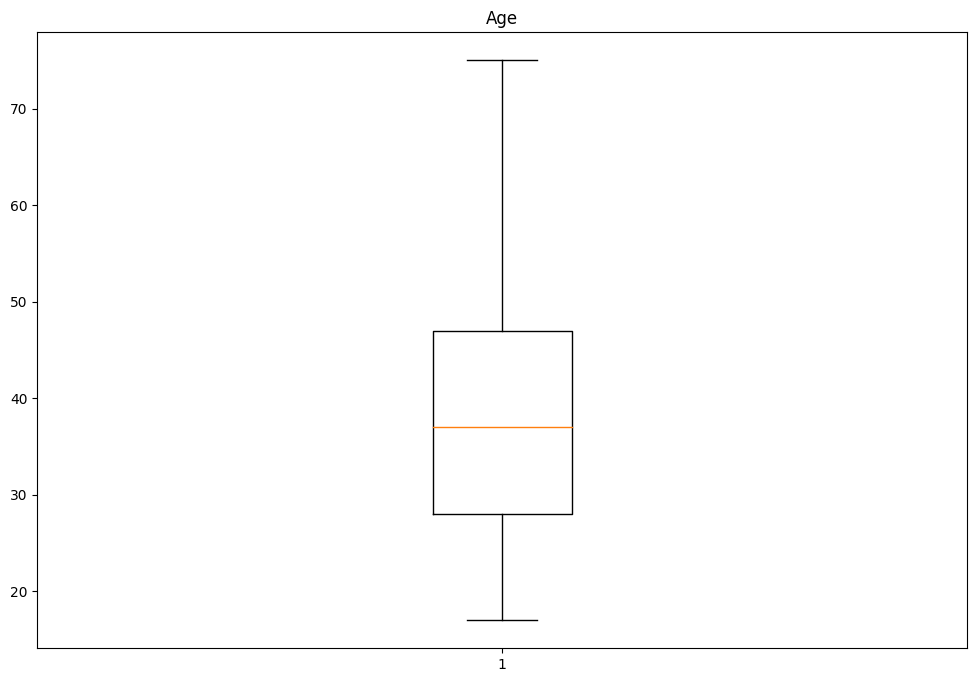

In [141]:
plt.figure(figsize=(12,8))
plt.boxplot(data['Age'])
plt.title("Age")

**<u>Findings:</u> <br>**
There were outliers in the Age column. Those outlier values are removed by finding out the lower limit and upper limit using Inter Quartile Range

**Hours-per-week**

In [142]:
Q1=np.percentile(data['Hours-per-week'],25,interpolation='midpoint')
Q3=np.percentile(data['Hours-per-week'],75,interpolation='midpoint')
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
outlier=[]
for x in data['Hours-per-week']:
    if x>upper_limit or x<lower_limit:
        outlier.append(x)
outlier

[13,
 16,
 80,
 30,
 60,
 20,
 80,
 15,
 25,
 60,
 55,
 60,
 58,
 32,
 70,
 22,
 30,
 25,
 60,
 60,
 25,
 56,
 60,
 28,
 60,
 60,
 20,
 30,
 30,
 24,
 24,
 2,
 60,
 16,
 20,
 25,
 12,
 65,
 1,
 28,
 24,
 55,
 60,
 12,
 60,
 55,
 20,
 20,
 55,
 70,
 20,
 60,
 30,
 20,
 30,
 60,
 12,
 75,
 24,
 98,
 15,
 60,
 56,
 16,
 60,
 80,
 25,
 54,
 15,
 24,
 55,
 60,
 30,
 20,
 25,
 25,
 30,
 24,
 55,
 15,
 15,
 10,
 10,
 30,
 25,
 6,
 16,
 55,
 64,
 65,
 25,
 24,
 60,
 19,
 30,
 18,
 60,
 72,
 25,
 60,
 28,
 55,
 60,
 20,
 60,
 16,
 60,
 24,
 6,
 30,
 20,
 20,
 20,
 60,
 60,
 25,
 20,
 8,
 20,
 80,
 58,
 9,
 30,
 8,
 32,
 55,
 60,
 12,
 70,
 24,
 60,
 80,
 28,
 21,
 60,
 20,
 60,
 32,
 55,
 20,
 20,
 24,
 55,
 60,
 64,
 26,
 60,
 60,
 14,
 60,
 60,
 55,
 15,
 20,
 32,
 60,
 25,
 10,
 16,
 5,
 55,
 30,
 20,
 20,
 60,
 20,
 30,
 65,
 25,
 15,
 60,
 20,
 24,
 15,
 20,
 25,
 72,
 20,
 20,
 18,
 70,
 55,
 30,
 32,
 55,
 24,
 56,
 60,
 55,
 30,
 60,
 20,
 30,
 20,
 20,
 30,
 20,
 75,
 60,
 60,
 24,
 25

In [143]:
ind=data["Hours-per-week"]>upper_limit
i=data.loc[ind].index
data.drop(i,inplace=True)

Text(0.5, 1.0, 'Hours-per-week')

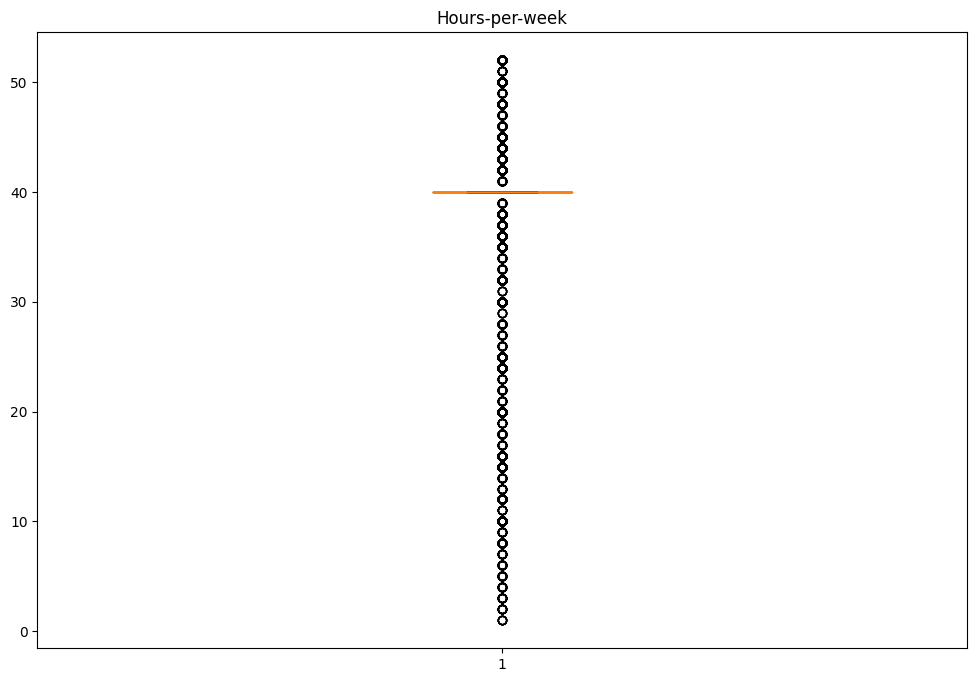

In [144]:
plt.figure(figsize=(12,8))
plt.boxplot(data['Hours-per-week'])
plt.title('Hours-per-week')

**<u>Findings:</u> <br>**
There were outliers in the Hours-per-week column. Those outlier values are removed by finding out the lower limit and upper limit using Inter Quartile Range

In [145]:
data.shape

(26674, 11)

***
**After removing the outliers, removing the insignificant columns and rows containing special Character the shape of the dataset has been changed from (32561, 14) to (26674, 11)**
***

In [146]:
data.to_csv('cleaned_salary.csv', index=False)

In [147]:
cleaned_data=pd.read_csv('cleaned_salary.csv')
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26674 entries, 0 to 26673
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             26674 non-null  int64 
 1   Workclass       26674 non-null  object
 2   Education       26674 non-null  object
 3   Marital-status  26674 non-null  object
 4   Occupation      26674 non-null  object
 5   Relationship    26674 non-null  object
 6   Race            26674 non-null  object
 7   Sex             26674 non-null  object
 8   Hours-per-week  26674 non-null  int64 
 9   Native-country  26674 non-null  object
 10  Salary          26674 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.2+ MB


**<u>Findings:</u> <br>**
The Cleaned data is converted to csv file to use it for hosting the web application

***
## <u>Encoding</u>

In [148]:
cat=data.describe(include=['object'])
cat

,Workclass,Education,Marital-status,Occupation,Relationship,Race,Sex,Native-country,Salary
count,26674,26674,26674,26674,26674,26674,26674,26674,26674
unique,7,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
freq,20203,8865,11855,3652,10340,22746,17441,24287,20592


**<u>Findings:</u> <br>**
From the above table we can analyse that the columns with 2 uique values(Sex and Salary) needs Label Encoding and all other columns needs One hot Encoding as they have more than 2 unique values

<u>**Label Encoding**</u>

In [149]:
cat_1=['Sex','Salary']

In [150]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
data[cat_1] = data[cat_1].apply(label_en.fit_transform)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26674 entries, 0 to 30161
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             26674 non-null  int64 
 1   Workclass       26674 non-null  object
 2   Education       26674 non-null  object
 3   Marital-status  26674 non-null  object
 4   Occupation      26674 non-null  object
 5   Relationship    26674 non-null  object
 6   Race            26674 non-null  object
 7   Sex             26674 non-null  int64 
 8   Hours-per-week  26674 non-null  int64 
 9   Native-country  26674 non-null  object
 10  Salary          26674 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.4+ MB


<u>**One-Hot Encoding**<u/>

In [151]:
cat_2=['Workclass','Education','Marital-status','Occupation','Relationship','Race','Native-country']

In [152]:
data_encoded1=pd.get_dummies(data,columns=cat_2)
data_encoded1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26674 entries, 0 to 30161
Data columns (total 100 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Age                                        26674 non-null  int64
 1   Sex                                        26674 non-null  int64
 2   Hours-per-week                             26674 non-null  int64
 3   Salary                                     26674 non-null  int64
 4   Workclass_Federal-gov                      26674 non-null  bool 
 5   Workclass_Local-gov                        26674 non-null  bool 
 6   Workclass_Private                          26674 non-null  bool 
 7   Workclass_Self-emp-inc                     26674 non-null  bool 
 8   Workclass_Self-emp-not-inc                 26674 non-null  bool 
 9   Workclass_State-gov                        26674 non-null  bool 
 10  Workclass_Without-pay                      26674 n

In [153]:
data_encoded1.head()

,Age,Sex,Hours-per-week,Salary,Workclass_Federal-gov,Workclass_Local-gov,Workclass_Private,Workclass_Self-emp-inc,Workclass_Self-emp-not-inc,Workclass_State-gov,...,Native-country_Portugal,Native-country_Puerto-Rico,Native-country_Scotland,Native-country_South,Native-country_Taiwan,Native-country_Thailand,Native-country_Trinadad&Tobago,Native-country_United-States,Native-country_Vietnam,Native-country_Yugoslavia
0,39,1,40,0,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,50,1,13,0,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,38,1,40,0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,1,40,0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,0,40,0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### <u>Scaling</u>

In [154]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()# define standard scaler
X=data_encoded1.drop(['Salary'],axis=1)
y=data_encoded1['Salary']

In [155]:
data_encoded1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26674 entries, 0 to 30161
Data columns (total 100 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Age                                        26674 non-null  int64
 1   Sex                                        26674 non-null  int64
 2   Hours-per-week                             26674 non-null  int64
 3   Salary                                     26674 non-null  int64
 4   Workclass_Federal-gov                      26674 non-null  bool 
 5   Workclass_Local-gov                        26674 non-null  bool 
 6   Workclass_Private                          26674 non-null  bool 
 7   Workclass_Self-emp-inc                     26674 non-null  bool 
 8   Workclass_Self-emp-not-inc                 26674 non-null  bool 
 9   Workclass_State-gov                        26674 non-null  bool 
 10  Workclass_Without-pay                      26674 n

In [156]:
data_encoded1.head()

,Age,Sex,Hours-per-week,Salary,Workclass_Federal-gov,Workclass_Local-gov,Workclass_Private,Workclass_Self-emp-inc,Workclass_Self-emp-not-inc,Workclass_State-gov,...,Native-country_Portugal,Native-country_Puerto-Rico,Native-country_Scotland,Native-country_South,Native-country_Taiwan,Native-country_Thailand,Native-country_Trinadad&Tobago,Native-country_United-States,Native-country_Vietnam,Native-country_Yugoslavia
0,39,1,40,0,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,50,1,13,0,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,38,1,40,0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,1,40,0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,0,40,0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# <u>Modeling</u>

In [157]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.20, random_state=42)

In [158]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (21339, 99)
Training Labels Shape: (21339,)
Testing Features Shape: (5335, 99)
Testing Labels Shape: (5335,)


**The data is split into train and test and the shape of each train and test data are printed**

**The Different models are applied to the dataset to find the best fit model**

***

###  1.Logistic Regression

In [159]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(X_train,y_train)
prediction1=log_model.predict(X_test)

In [160]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,prediction1))
print('R2 Value:',metrics.r2_score(y_test,prediction1))

MSE 0.1542642924086223
R2 Value: 0.11197600333633084


In [161]:
m1=mean_squared_error(y_test,prediction1)
r1=metrics.r2_score(y_test,prediction1)
performance1=pd.DataFrame([m1,r1])
performance1.columns=['Logistic Regression']

### 2.Random Forest

In [162]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
model2=regressor.fit(X_train,y_train)
prediction2=model2.predict(X_test)

In [163]:
print("MSE",mean_squared_error(y_test,prediction2))
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_test,prediction2))

MSE 0.12141834503882395
R2 Value: 0.3010540394917838


In [164]:
m2=mean_squared_error(y_test,prediction2)
r_2=metrics.r2_score(y_test,prediction2)
performance2=pd.DataFrame([m2,r_2])
performance2.columns=['Random Forest Regressor']

### 3.SVM Regressor

In [165]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_test,y_test)
prediction3 = svm.predict(X_test)

In [166]:
print("MSE ",mean_squared_error(y_test,prediction3))
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_test,prediction3))

MSE  0.14601686972820993
R2 Value: 0.159452377398544


In [167]:
m3=mean_squared_error(y_test,prediction3)
r3=metrics.r2_score(y_test,prediction3)
performance3=pd.DataFrame([m3,r3])
performance3.columns=['SVM Regressor']

Calculate accuracy


In [168]:
regressor = RandomForestRegressor()
model2=regressor.fit(X_train,y_train)
prediction2=model2.predict(X_test)

In [169]:
# Calculate the absolute errors
errors = abs(prediction2 - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.21


In [170]:
all_features=round(np.mean(errors), 2)

In [171]:
import sklearn
import math
mse = sklearn.metrics.mean_squared_error(y_test, prediction2)
rmse = math.sqrt(mse)
accuracy = 100*max(0,rmse)
print('Accuracy for Random Forest',round(accuracy, 2), '%.')

Accuracy for Random Forest 34.97 %.


In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error


# Create a Logistic Regression model
log_model = LogisticRegression()

# Train the model on your training data
log_model.fit(X_train, y_train)

# Predict classes for your test data
y_pred = log_model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression:", round(accuracy * 100, 2), "%")
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error of Logistic Regression:", mae)

Accuracy of Logistic Regression: 84.57 %
Mean Absolute Error of Logistic Regression: 0.1542642924086223


In [176]:
from sklearn.metrics import confusion_matrix

# Get predictions from your logistic regression model
y_pred = log_model.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)

[[3858  283]
 [ 540  654]]


In [178]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
svm = SVC(kernel='linear')
svm.fit(X_test,y_test)
prediction3 = svm.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Support Vector Machine:", round(accuracy * 100, 2), "%")
mae1 = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error of Logistic Regression:", mae1)

Accuracy of Support Vector Machine: 84.57 %
Mean Absolute Error of Logistic Regression: 0.1542642924086223


**<u>Findings:</u> <br>**
After finding the mean absolute error of the best fit model the Accurcy score is calucated